In [142]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("./lab5/lab5_plots", exist_ok=True)

Ex1

a) numarul de masini e masurat din ora in ora, deci rata de esantionare inseamna o esantionare pe ora, adica fs=1/3600

b) 18288 esantioane, un esantion pe ora => 18288 de ore, adica 18288/24=762 zile

c) Nyquist: fs>=2*frecv_max, iar fs=1/3600 => frecv_max ... 1/(3600**2), 1/7200

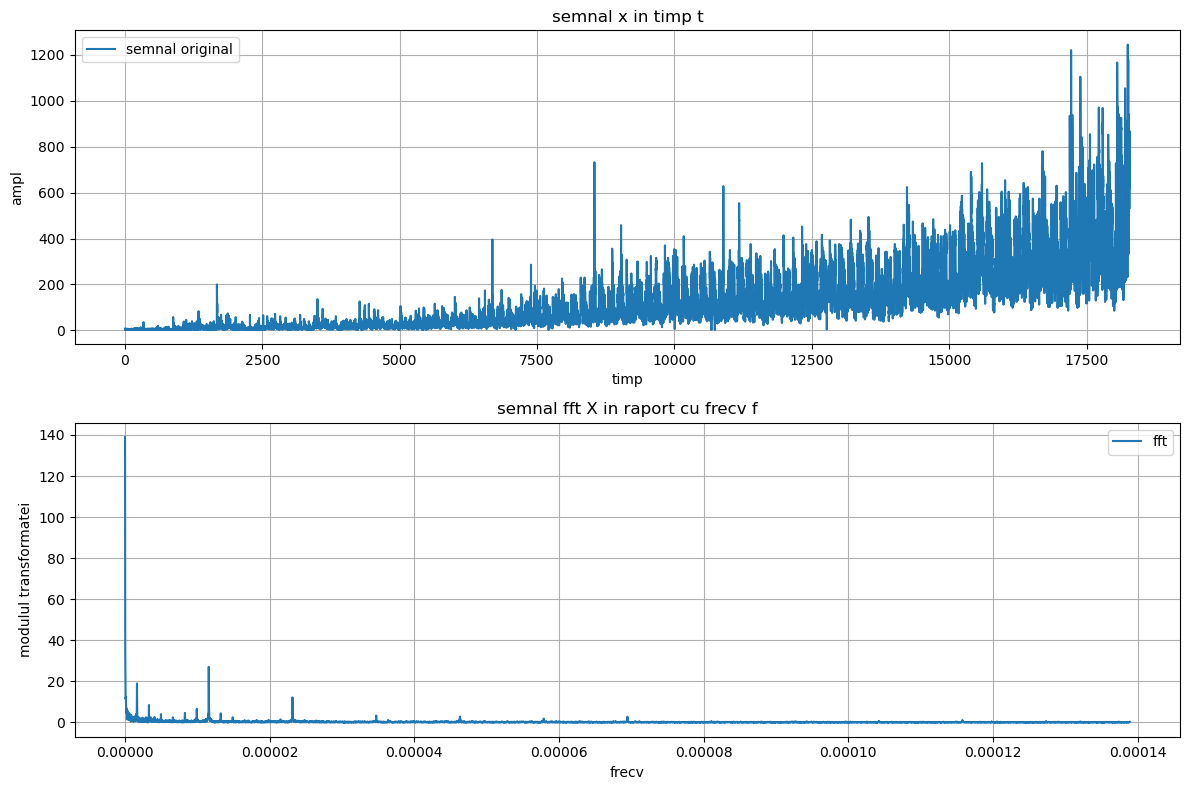

In [143]:
# d)
os.makedirs("lab5/lab5_plots/d", exist_ok=True)

x = np.genfromtxt('./lab5/Train.csv', delimiter=',')
x = x[:, 2] # coloana 2
x = x[1:] # evit linia pe care sunt definite coloanele
N = len(x)

dt = 3600 # secunde per esantion
t = np.arange(N)*dt/3600 # conversie ore
# voi plota t cu x original

fs = 1/3600
X = np.fft.fft(x)
X = np.abs(X/N) # modulul transformatei
X = X[:int(N/2)] # simetrie
f = fs*np.linspace(0, N/2, int(N/2))/N # vector frecvente
# voi plota f cu X pe care s-a plicat fft

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(t, x, label='semnal original')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('ampl')
axs[0].set_title('semnal x in timp t')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(f, X, label='fft')
axs[1].set_xlabel('frecv')
axs[1].set_ylabel('modulul transformatei')
axs[1].set_title('semnal fft X in raport cu frecv f')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.savefig(fname="./lab5/lab5_plots/d/trafic_vizulizat.pdf", format="pdf")
plt.show()


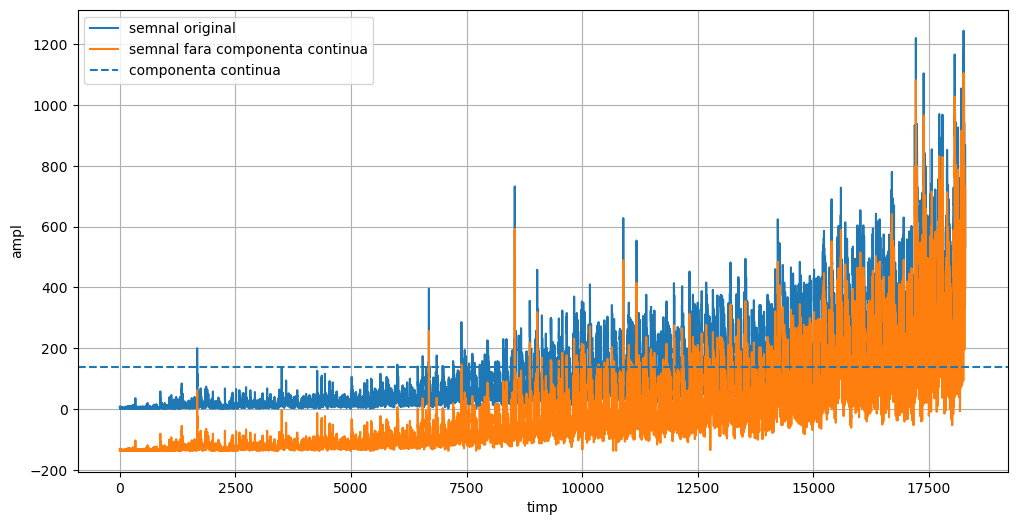

In [144]:
# e) are componenta continua din moment ce eliminarea ei din semnalul original nu reprezinta tot semnalul original
os.makedirs("lab5/lab5_plots/e", exist_ok=True)

# x, t si N de la subpunctul trecut
x_continuu = np.mean(x) # componenta continua
x_ = x-x_continuu # semnal fara componenta continua

plt.figure(figsize=(12, 6))
plt.plot(t, x, label='semnal original')
plt.plot(t, x_, label='semnal fara componenta continua')
plt.axhline(x_continuu, linestyle='--', label='componenta continua')
plt.xlabel('timp')
plt.ylabel('ampl')
plt.legend()
plt.grid(True)
plt.savefig(fname="./lab5/lab5_plots/e/semnalul_original_si_semnalul_fara_componenta_continua.pdf", format="pdf")
plt.show()

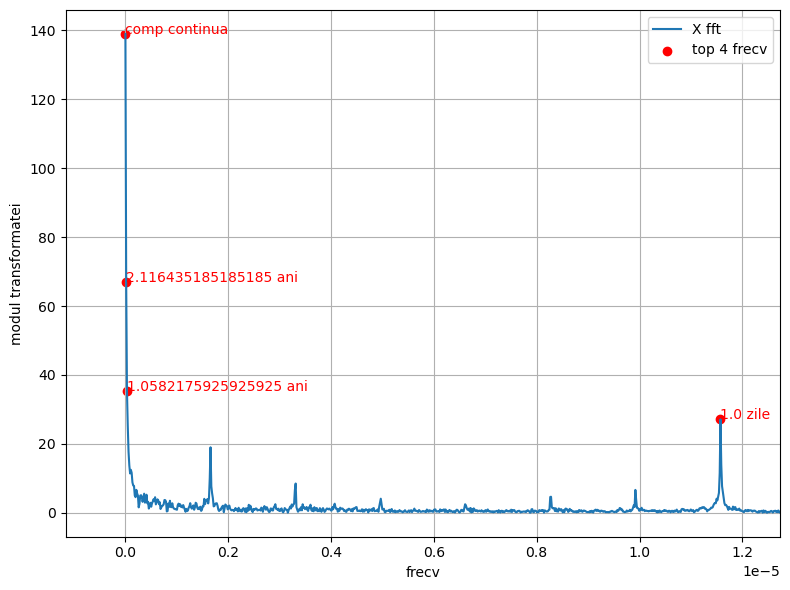

In [145]:
# f) top 4 frecv = cat de des se repeta ciclurile la anumite intervale de timp in datele din Train.csv
# in plot e un punct ce reprez comp continua, adica mereu e prezenta daca semnalul o contine (prin eliminarea ei se obtine un semnal diferit de cel original)
# ciclu de 1 zi, aprox 1 an si aprox 2 ani
os.makedirs("lab5/lab5_plots/f", exist_ok=True)

# X si f de la subpunctul d)
L_i = np.argsort(X)[-4:][::-1] # lista indici pt ultimele 4 frecv ordonate desc dupa valorile lui X fft
L_frecv = f[L_i]
L_mag = X[L_i]

plt.figure(figsize=(8, 6))
plt.plot(f, X, label='X fft')
plt.scatter(L_frecv, L_mag, color='red', label='top 4 frecv')

for frecv, mag in zip(L_frecv, L_mag):
    if frecv!=0:
        perioada_ore = round(1/(frecv*3600)) # perioada in ore
        if perioada_ore<24:
            label = f"{perioada_ore} ore"
        else:
            zile = perioada_ore/24
            if zile<30:
                label = f"{zile} zile"
            else:
                luni = zile/30
                if luni<12:
                    label = f"{luni} luni"
                else:
                    ani = luni/12
                    label = f"{ani} ani"
    else:
        label = "comp continua"
    plt.annotate(label, (frecv, mag), color='red')

plt.xlabel('frecv')
plt.ylabel('modul transformatei')
plt.legend()
plt.grid(True)
offset_x = (max(L_frecv)-min(L_frecv))*0.1 # 10% din intervalul celor mai mari 4 frecv
plt.xlim(min(L_frecv)-offset_x, max(L_frecv)+offset_x)
plt.tight_layout()
plt.savefig("./lab5/lab5_plots/f/cele_mai_mari_4_frecvente_X_fft.pdf", format='pdf')
plt.show()


index de start: 9408
index de stop: 10128


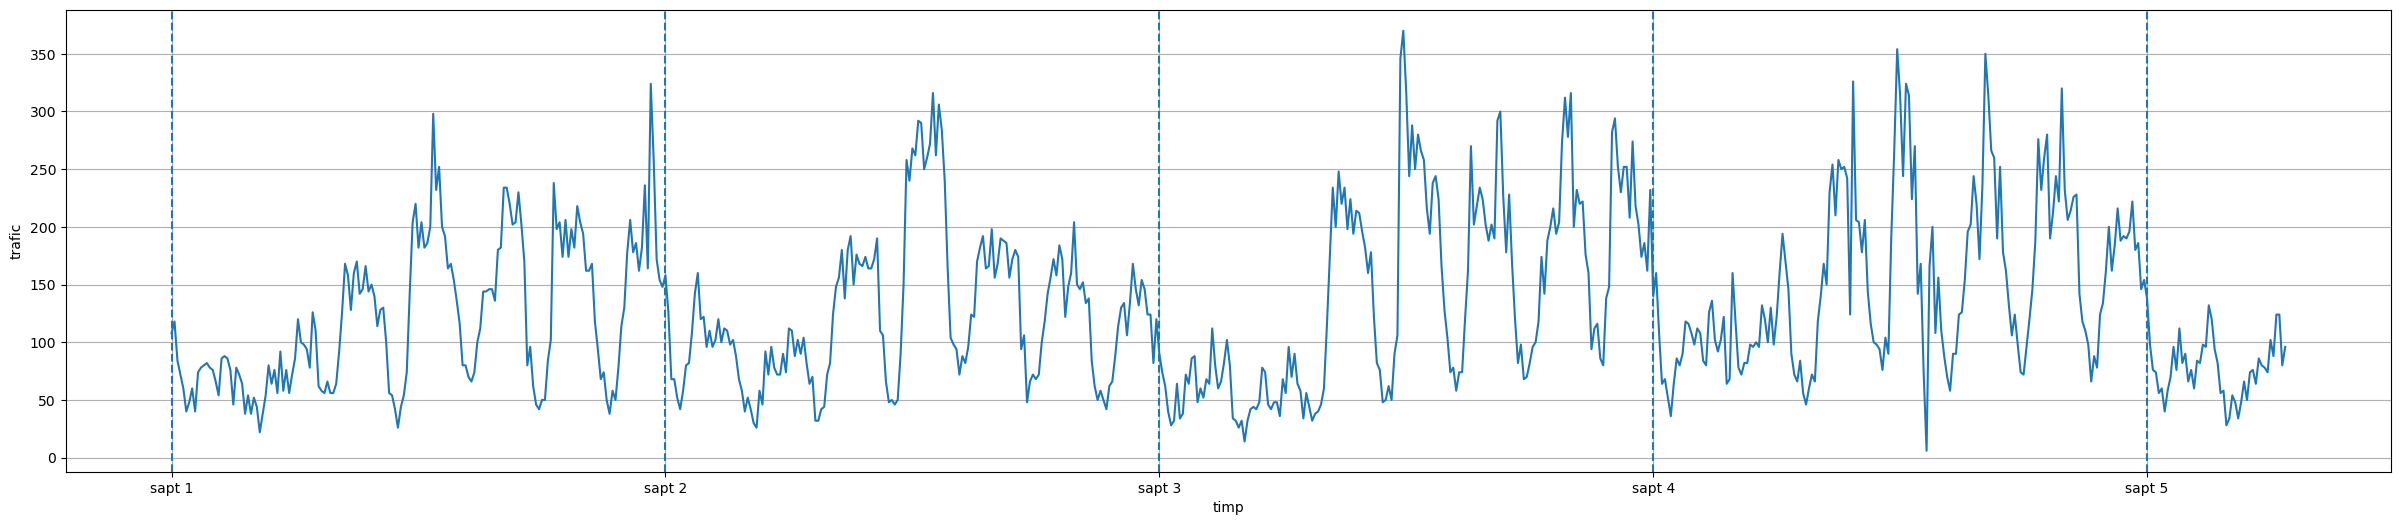

In [146]:
# g) nu avem exact data in care inecpe o zi de luni, iar indexul de start >=1000, deci orice multiplu de 168 >=1000 (1 esantion pe ora => (1*24*7*30) esantionane pe saptamana, adica 168)
# fie multiplul ales 9408 (168*56 saptamani) => verificare 9408/24=392 zile, 392/7=56 saptamani
# deci pentru o perioada de o luna incepand cu ziua de luni din saptamana 56, inseamna ca indexul de stop e 9408+30*24=9408+720=10128(720 de esantioane pe luna)
os.makedirs("lab5/lab5_plots/g", exist_ok=True)

esantioane_zi = 24
esantioane_sapt = esantioane_zi*7
esantioane_luna = esantioane_zi*30

index_start = 9408
index_stop = index_start+esantioane_luna

if index_stop<len(x):
    x_luna = x[index_start:index_stop]
    t_luna = t[index_start:index_stop]
    print(f"index de start: {index_start}")
    print(f"index de stop: {index_stop}")

    plt.figure(figsize=(30, 6))
    plt.plot(t_luna, x_luna)
    plt.xlabel('timp')
    plt.ylabel('trafic')
    plt.grid(True)
    
    nr_sapt = len(x_luna)//esantioane_sapt
    if len(x_luna)%esantioane_sapt>0: # daca avem zile ramase, se adauga o sapt in plus
        nr_sapt += 1
    L_tick_sapt = [index_start+i*esantioane_sapt for i in range(nr_sapt)]
    L_label_sapt = [f'sapt {i+1}' for i in range(nr_sapt)]
    plt.xticks(L_tick_sapt, L_label_sapt)
    for tick in L_tick_sapt:
        plt.axvline(x=tick, linestyle='--')
    plt.savefig("./lab5/lab5_plots/g/trafic_o_luna_luni_start.pdf", format='pdf')
    plt.show()
else:
    print("Index ales invalid deoarece intrece perioada pe care s-a masurat traficul din Train.csv")

h)
- se observa o creste constanta, iar din exercitiul cu topul celor 4 frecvente deduc ca s-a inregistrat traficul in decursul a mai multor ani, cel putin 2 ani

- pentru a observa un trend la nivel de saptamana, aleg indexul de la inceputul lunii, tot 9408 (presupunand ca se incepe cu prima zi a saptamanii, desi poate pe datele reale e total bullshit)
    - din plotul de mai jos rezulta ca exista zone cu trafic redus (probabil noapte) si crescut (probabil ziua) in decursul unei zile, fiind unele zile mai circulate decat altele (diferenta intre o zi a sapt si o zi din weekend)

- pentru a observa un trend la nivel de an (12 luni deoarece din datele data doar presupun ca voi incepe esantionarea de la inceput), voi face un plot pentru fiecare perioada de 12 luni, inclusiv cu lunile ramase care nu completeaza acest interval de 12
    - din plotul de mai jos rezulta ca si din setul de date ca analiza traficului incepe undeva din vara (lumea pleaca in vacanta) si cu fiecare perioada de 12 luni traficul creste ca sa acomodeze o populatie mai mare

- concluzii:
    - pare ca datele incep sa fie inregistrate din vara si rezulta ca primele doua patrimi + ultima patrime ale anului sa fie circulate
    - pare ca datele se termina dupa 2 ani si ceva, adica exact acele 762 de zile

index de start: 9408
index de stop: 9576


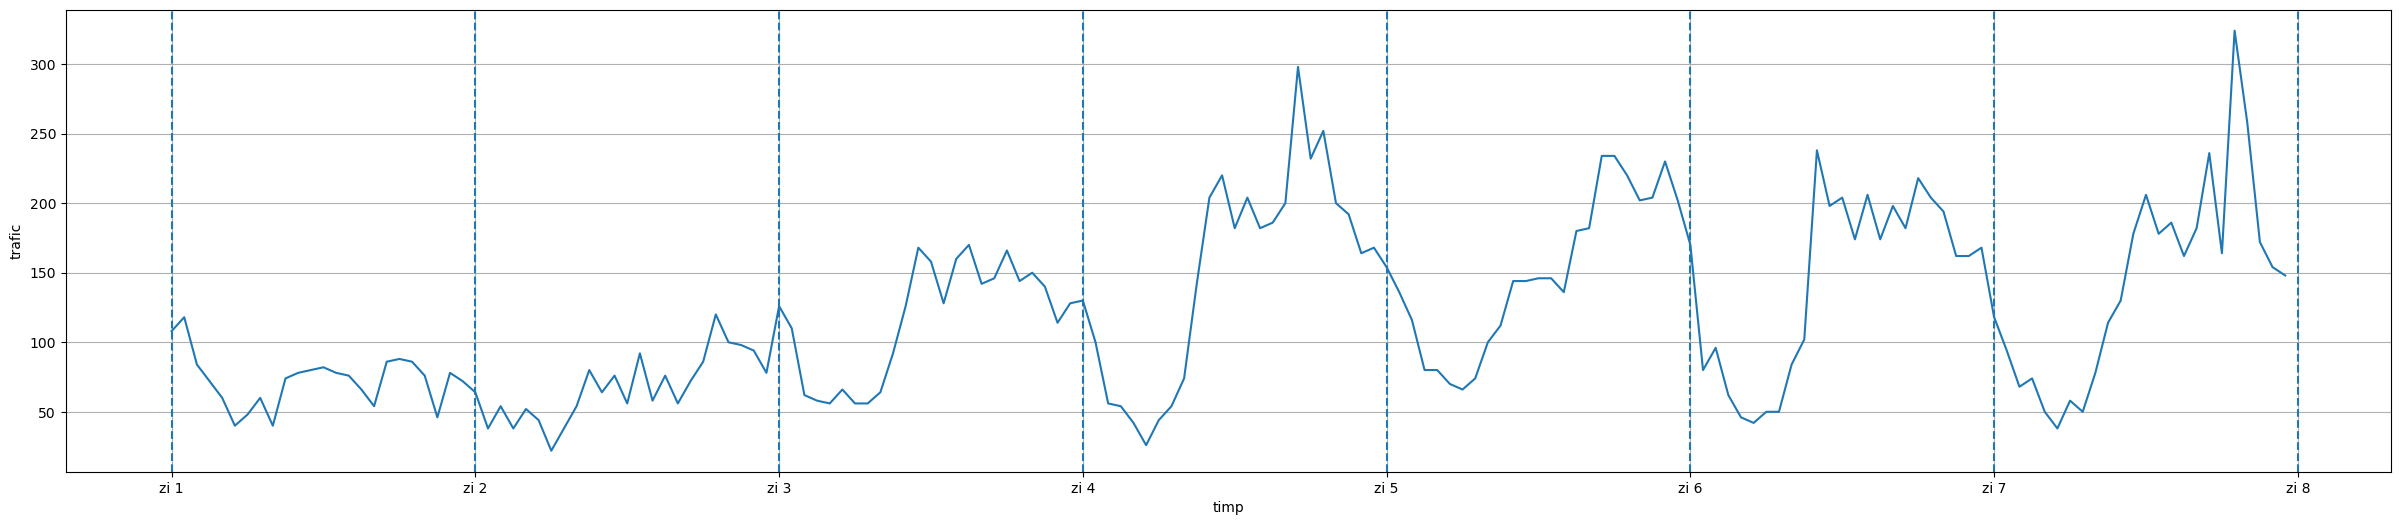

In [147]:
# esantioane_zi, esantioane_sapt de la subpunctul g)
os.makedirs("lab5/lab5_plots/h", exist_ok=True)

index_start = 9408
index_stop = index_start+esantioane_sapt

if index_stop<len(x):
    x_sapt = x[index_start:index_stop]
    t_sapt = t[index_start:index_stop]
    print(f"index de start: {index_start}")
    print(f"index de stop: {index_stop}")

    plt.figure(figsize=(30, 6))
    plt.plot(t_sapt, x_sapt)
    plt.xlabel('timp')
    plt.ylabel('trafic')
    plt.grid(True)
    nr_zile = 7
    L_tick_zi = [index_start+i*esantioane_zi for i in range(nr_zile+1)]
    L_label_zi = [f'zi {i+1}' for i in range(nr_zile+1)]
    plt.xticks(L_tick_zi, L_label_zi)
    for tick in L_tick_zi:
        plt.axvline(x=tick, linestyle='--')
    plt.savefig("./lab5/lab5_plots/h/trafic_o_sapt_luni_start.pdf", format='pdf')
    plt.show()
else:
    print("Index ales invalid deoarece intrece perioada pe care s-a masurat traficul din Train.csv")

index de start: 0
index de stop: 8640

index de start: 8640
index de stop: 17280

index de start: 17280
index de stop: 25920



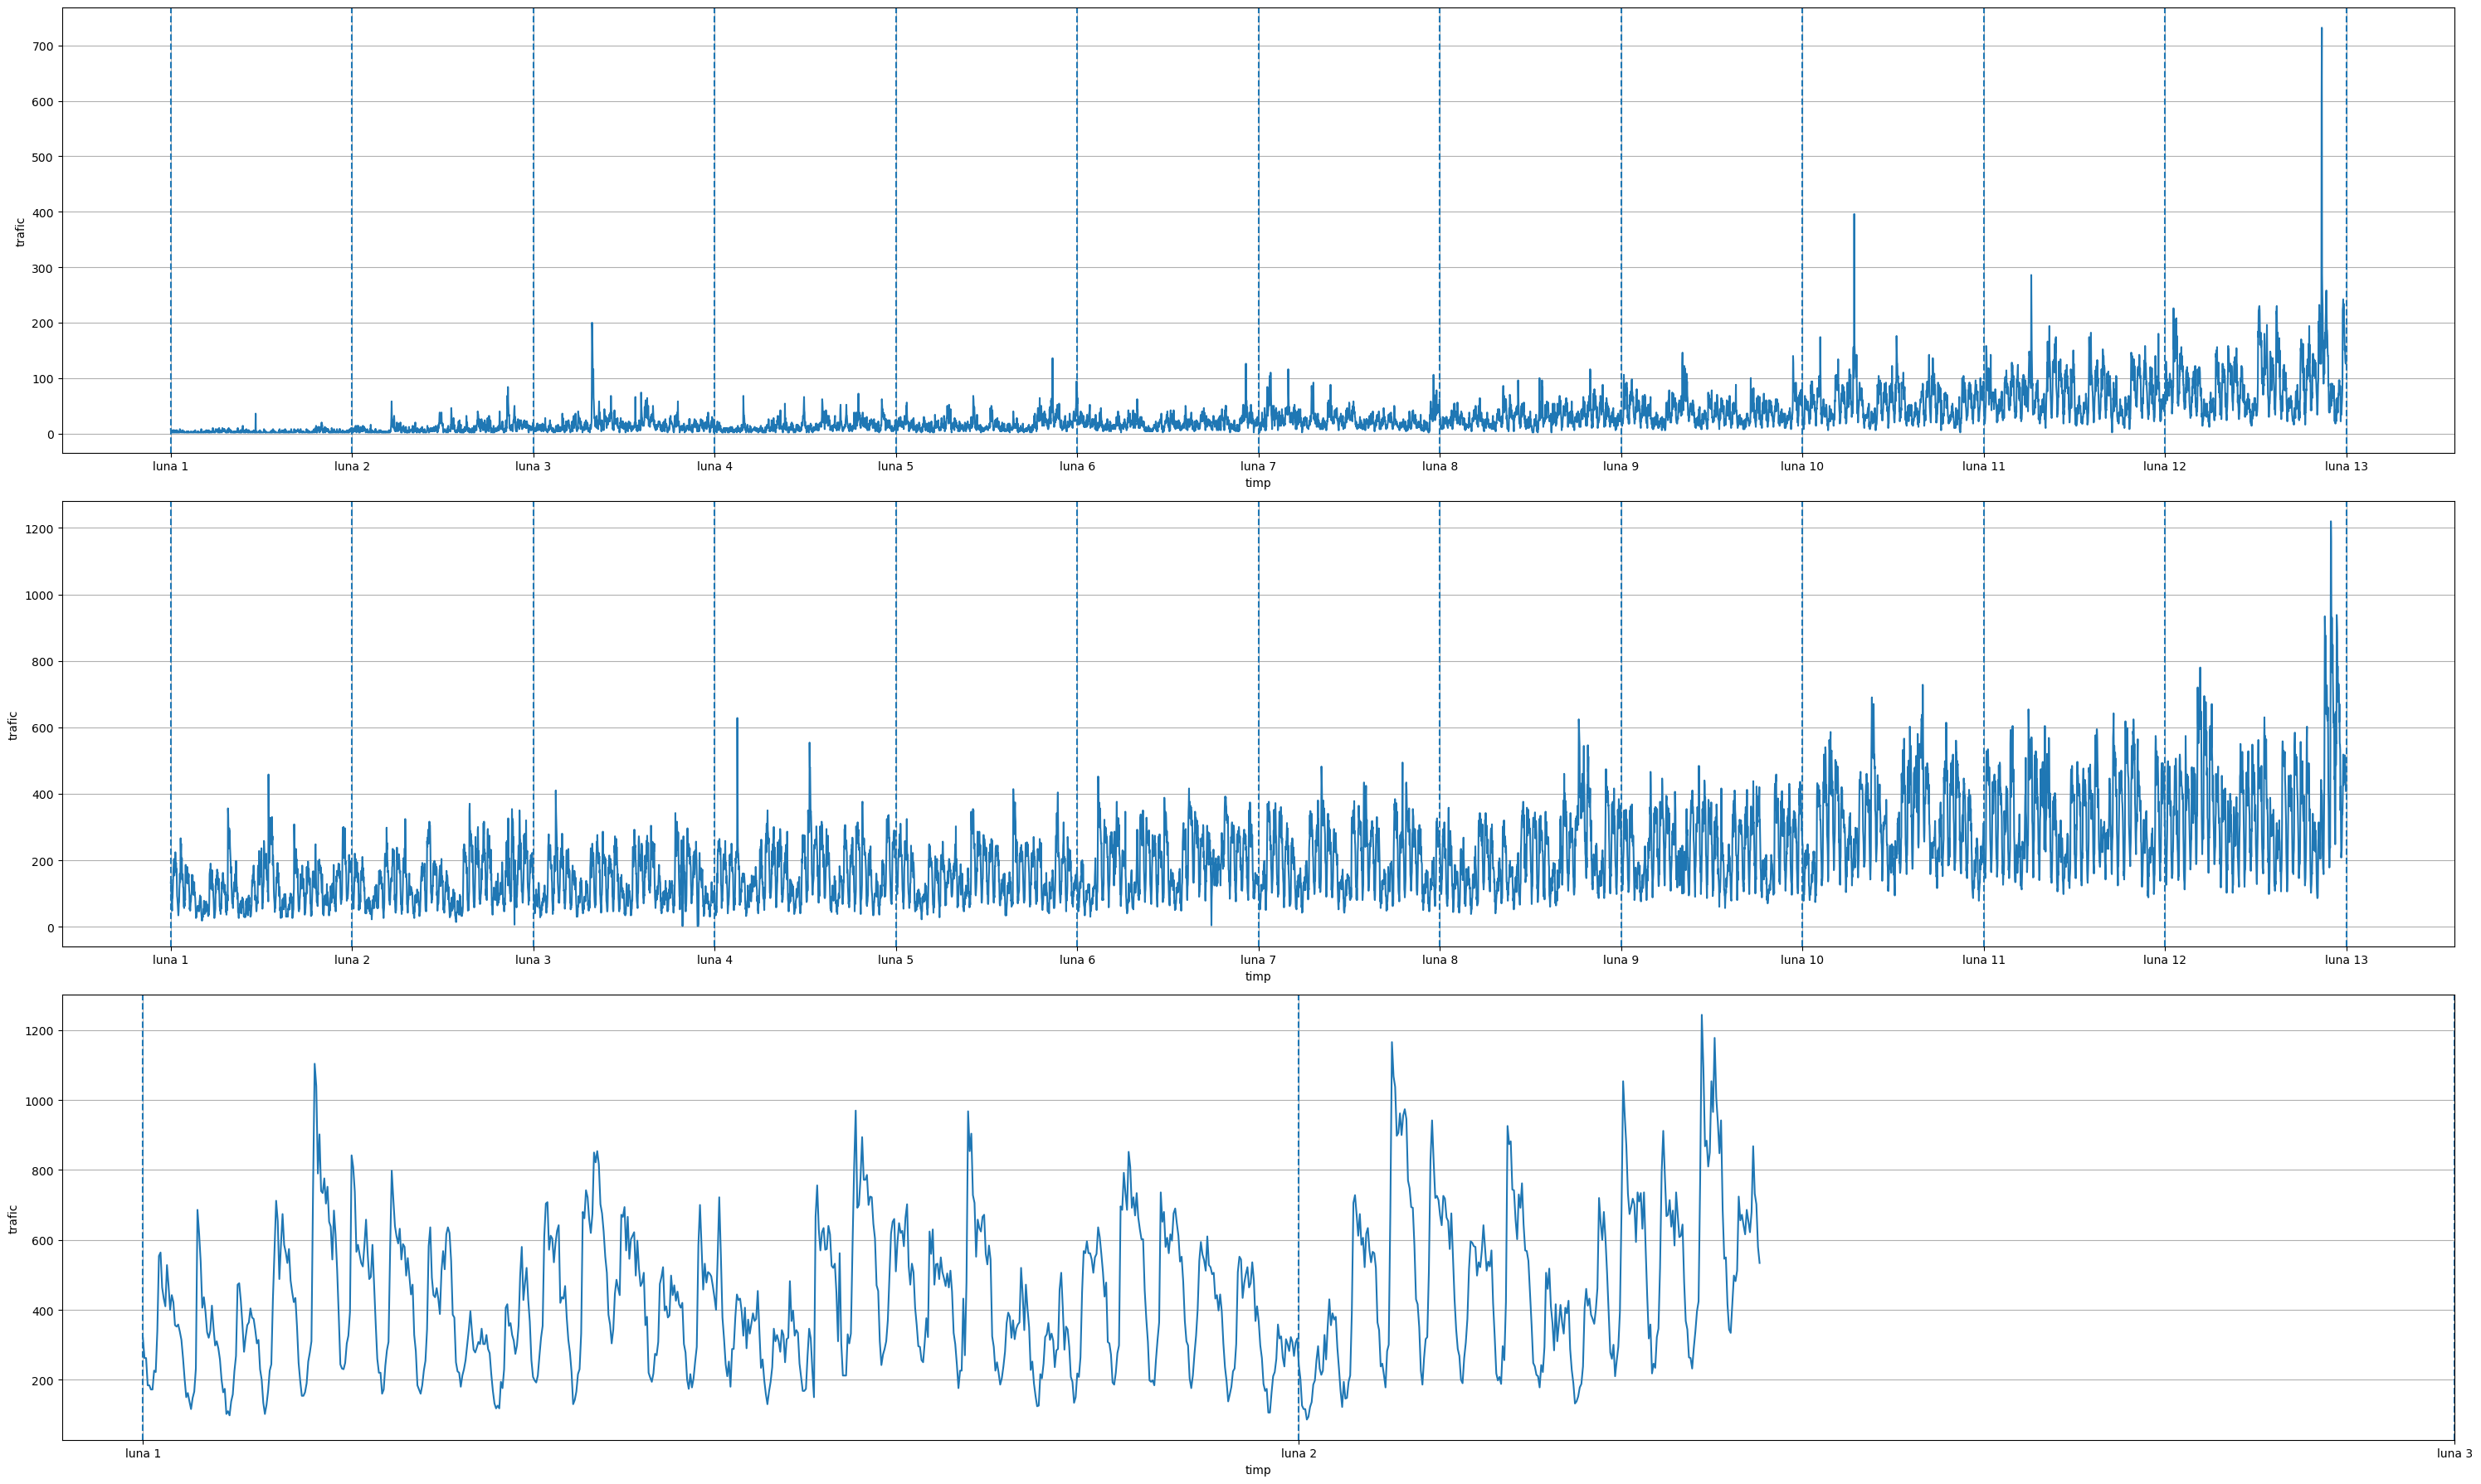

In [148]:
# esantioane_zi, esantioane_sapt, esantioane_luna de la subpunctul g)
os.makedirs("lab5/lab5_plots/h", exist_ok=True)

esantioane_an = esantioane_luna*12
nr_ani = len(x)//esantioane_an
if len(x)%esantioane_an>0:
    nr_ani += 1

fig, axs = plt.subplots(nr_ani, 1, figsize=(30, 6*nr_ani))
axs = axs.flatten()

for an in range(nr_ani):
    index_start = an*esantioane_an
    index_stop = index_start+esantioane_an

    x_an = x[index_start:index_stop]
    t_an = t[index_start:index_stop]
    print(f"index de start: {index_start}")
    print(f"index de stop: {index_stop}", end="\n\n")

    axs[an].plot(t_an, x_an)
    axs[an].set_xlabel('timp')
    axs[an].set_ylabel('trafic')
    axs[an].grid(True)
    nr_luni = len(x_an)//esantioane_luna
    if len(x_an)%esantioane_luna>0:
        nr_luni += 1
    nr_luni_afisare = min(12, nr_luni)
    L_tick_luna = [index_start+i*esantioane_luna for i in range(nr_luni_afisare+1)]
    L_label_luna = [f'luna {i+1}' for i in range(nr_luni_afisare+1)]
    axs[an].set_xticks(L_tick_luna, L_label_luna)
    for tick in L_tick_luna:
        axs[an].axvline(x=tick, linestyle='--')

plt.tight_layout()
plt.savefig("./lab5/lab5_plots/h/trafic_pe_an_zi_inceput_de_an_start.pdf", format='pdf')
plt.show()

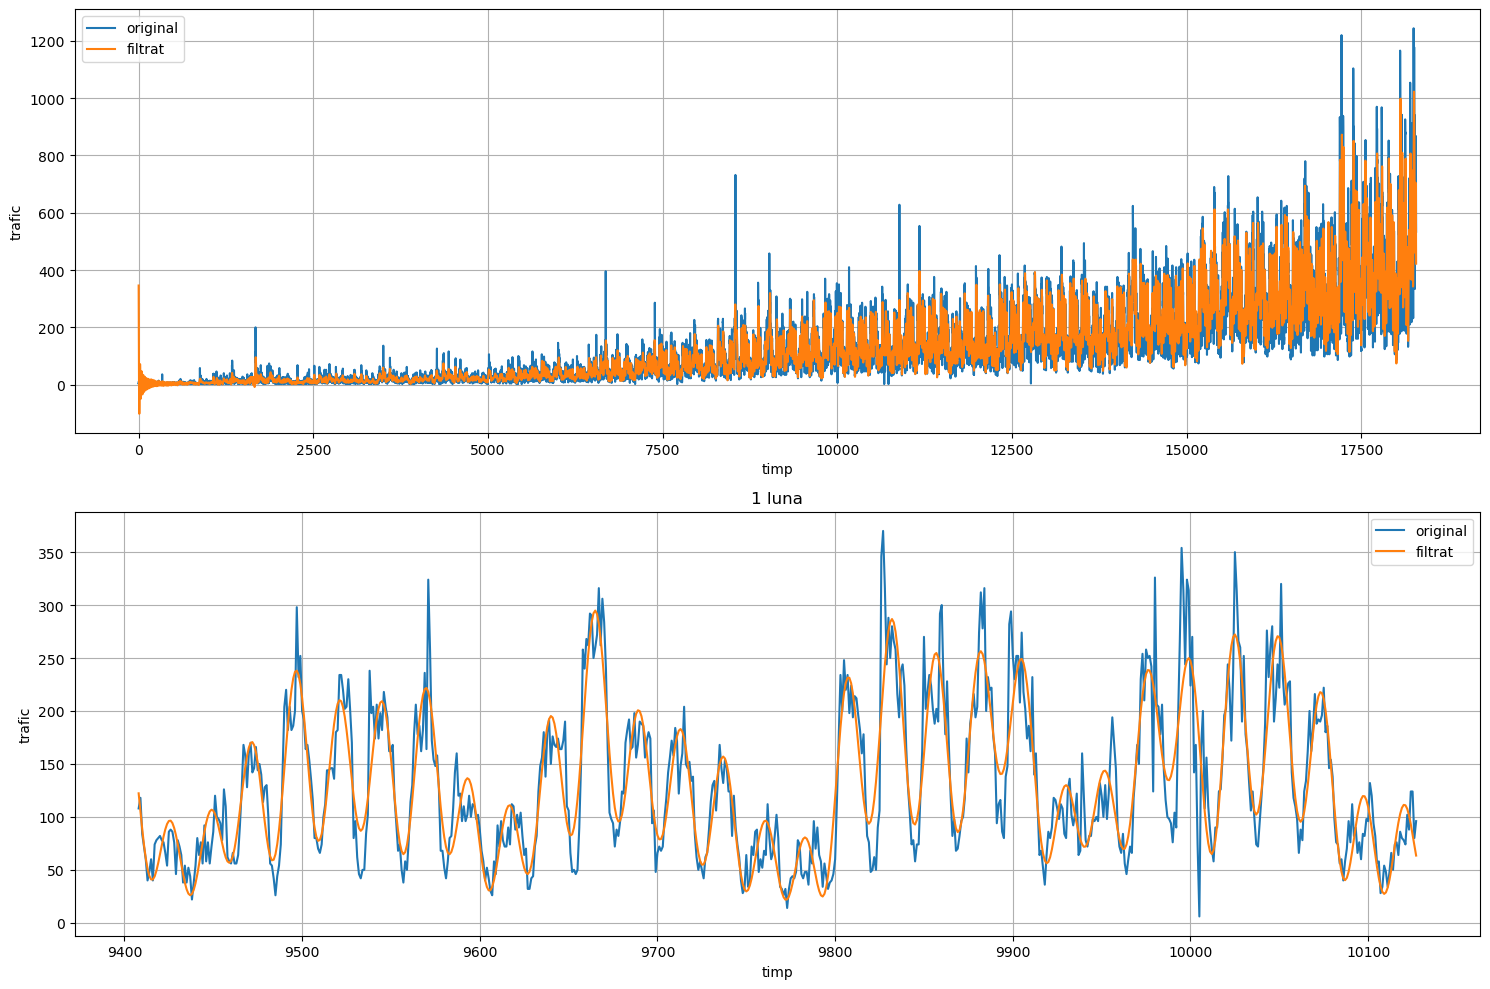

In [170]:
# i) trebuie sa fie eliminate componente sub un threshold
# aleg sa pastrez toate componentele a.i. 1/(n*3600) sa fie o val mare, adica n e o val mica, deoarece daca elimin frecvente intre ce m-ar interesa de fapt (1 zi, 1 sapt, 1 luna, 3 luni = 1 anotimp, 1 an), se pierde informatie importanta care imi sugereaza ca traficul devine o val negativa
os.makedirs("lab5/lab5_plots/i", exist_ok=True)

X = np.fft.fft(x)
N = len(x)
frecv = np.fft.fftfreq(N, d=dt)

frecv_threshold = 1/(23*3600) # pastreaza toate componentele >= 23 ore, dar va elimina fluctuatiile rapide (la nivel de ore) care pot fi zgomot
filtru = np.abs(frecv)<=frecv_threshold
X_filtrat = X*filtru
x_filtrat = np.real(np.fft.ifft(X_filtrat)) # reconstruire semnal filtrat

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(t, x, label='original')
axs[0].plot(t, x_filtrat, label='filtrat')
axs[0].set_xlabel('timp')
axs[0].set_ylabel('trafic')
axs[0].legend()
axs[0].grid(True)

zoom_start = 9408
zoom_end = zoom_start+esantioane_luna
axs[1].plot(t[zoom_start:zoom_end], x[zoom_start:zoom_end], label='original')
axs[1].plot(t[zoom_start:zoom_end], x_filtrat[zoom_start:zoom_end], label='filtrat')
axs[1].set_xlabel('timp')
axs[1].set_ylabel('trafic')
axs[1].set_title('1 luna')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("./lab5/lab5_plots/i/filtrare_frecvente_inalte.pdf", format='pdf')
plt.show()